In [1]:
import stock
from stock_model import NigModel

In [2]:
spy_weekly = stock.import_spy_weekly()
initial_model = NigModel.from_stock_moments(spy_weekly)
model = initial_model.reoptimize()

<Figure size 432x288 with 0 Axes>

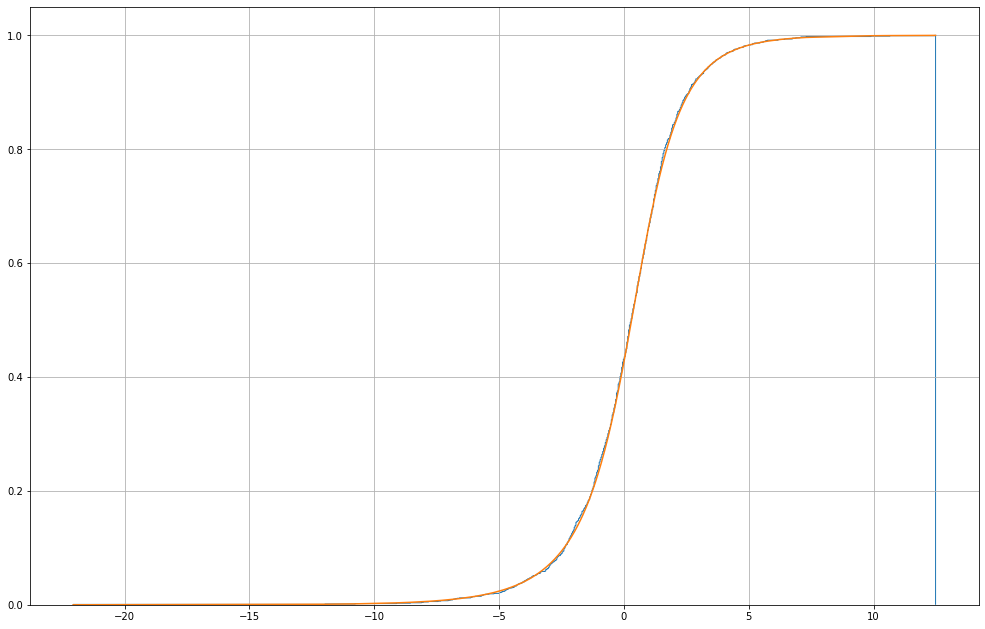

In [3]:
model.plot_comparison()